In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

In [4]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [5]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [6]:
df.shape

(103, 7)

## Data Cleaning

In [34]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")   
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","")      
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")      
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","")   
df["Production (Tons)"] = df["Production (Tons)"].str.replace(",","")   
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(",","") 

KeyError: 'Production (Tons)'

In [14]:
df

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,1,India,Asia,348448000,260721,4950000,"70393,5"
2,2,China,Asia,123059739,88287,1675215,"73459,1"
3,3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11949,8"


In [17]:
df.rename(columns = {"Production (Tons)" : "Production(Tons)"},inplace = True) 
df.rename(columns = {"Production per Person (Kg)" : "Production per Person(Kg)"},inplace = True)    
df.rename(columns = {"Acreage (Hectare)" : "Acreage(Hectare)"},inplace = True)    
df.rename(columns = {"Yield (Kg / Hectare)" : "Yield(Kg / Hectare)"},inplace = True)  

In [16]:
df

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,1,India,Asia,348448000,260721,4950000,"70393,5"
2,2,China,Asia,123059739,88287,1675215,"73459,1"
3,3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11949,8"


In [23]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production per Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg / Hectare)          1
dtype: int64

In [25]:
df[df["Acreage(Hectare)"].isna()]

,Unnamed: 0,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [118]:
df = df.dropna().reset_index()
df.drop(["index" , "Unnamed: 0"], axis = 1 , inplace = True )
df.head()

ValueError: cannot insert level_0, already exists

In [31]:
df.dtypes

level_0                       int64
Country                      object
Continent                    object
Production(Tons)             object
Production per Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg / Hectare)          object
dtype: object

In [41]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)   
df["Production per Person(Kg)"] = df["Production per Person(Kg)"].astype(float)      
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)      
df["Yield(Kg / Hectare)"] = df["Yield(Kg / Hectare)"].astype(float)    

In [110]:
df.dtypes

level_0                        int64
Country                       object
Continent                     object
Production(Tons)             float64
Production per Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg / Hectare)          float64
dtype: object

In [43]:
df.nunique()

level_0                      102
Country                      102
Continent                      6
Production(Tons)             102
Production per Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg / Hectare)          102
dtype: int64

## Univariate Analysis
in it we work on some particular columns

In [44]:
df.head()

,level_0,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


## How many countries produce sugarcane from each continent >

In [47]:
df1 = df.values

In [54]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

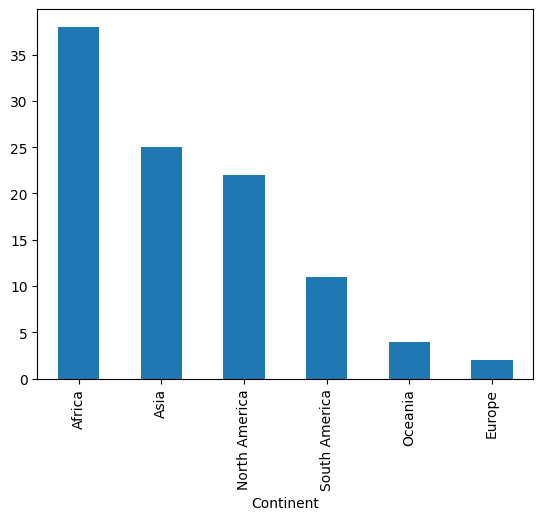

In [55]:
df["Continent"].value_counts().plot(kind = "bar")

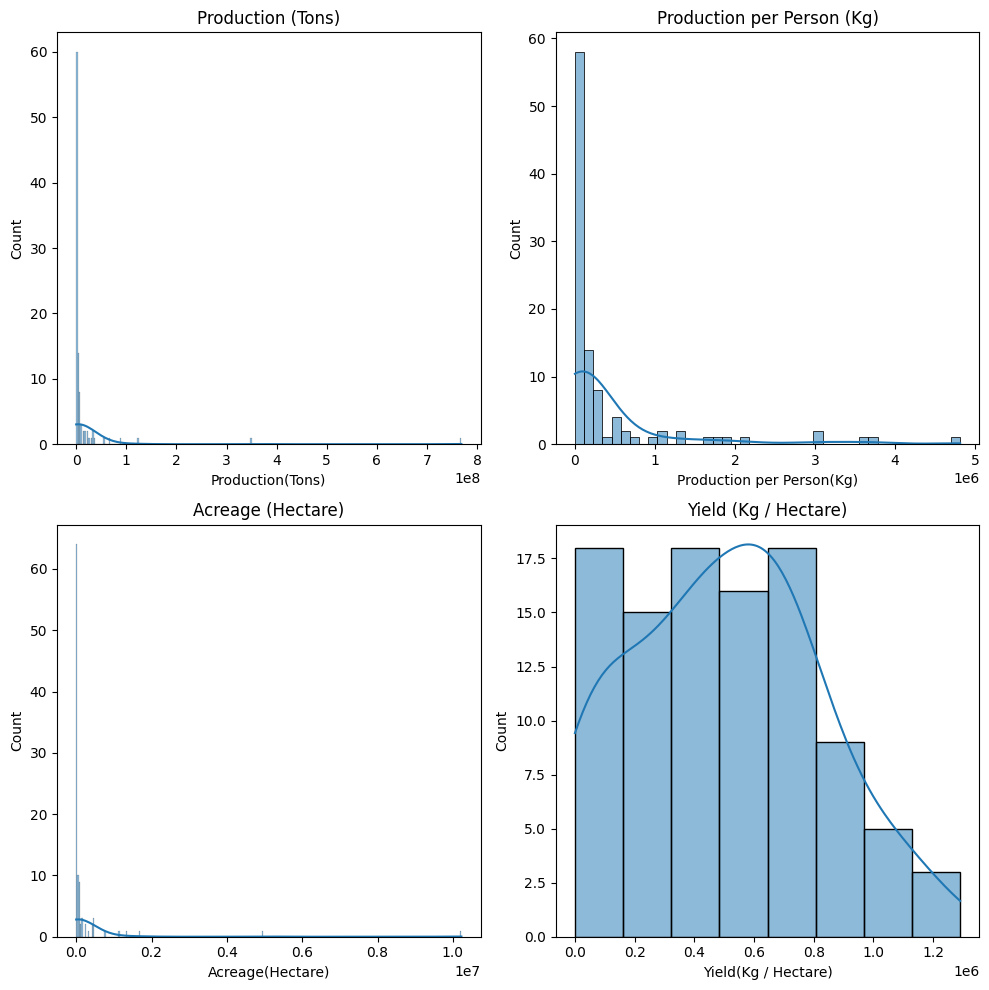

In [60]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.histplot(df["Production(Tons)"], kde=True)
plt.title("Production (Tons)")

plt.subplot(2,2,2)
sns.histplot(df["Production per Person(Kg)"], kde=True)
plt.title("Production per Person (Kg)")

plt.subplot(2,2,3)
sns.histplot(df["Acreage(Hectare)"], kde=True)
plt.title("Acreage (Hectare)")

plt.subplot(2,2,4)
sns.histplot(df["Yield(Kg / Hectare)"], kde=True)
plt.title("Yield (Kg / Hectare)")

plt.tight_layout()
plt.show()


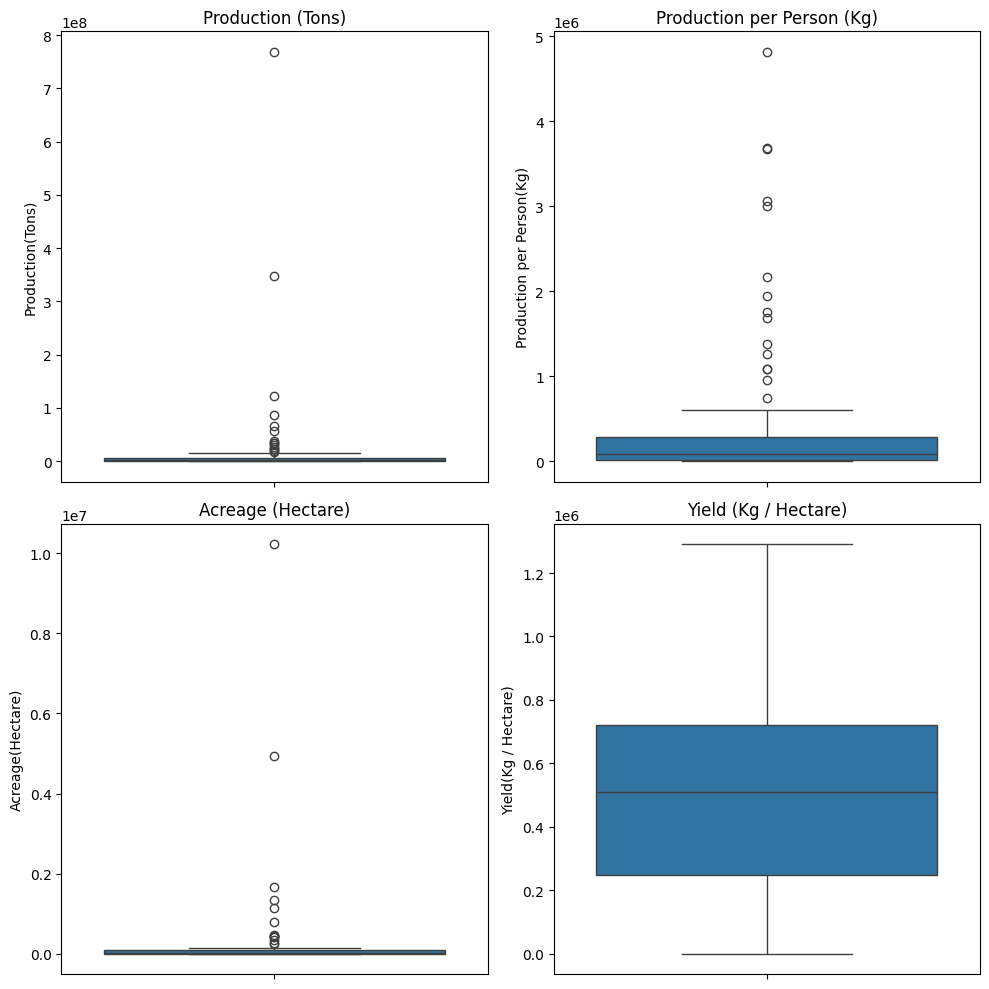

In [62]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production (Tons)")

plt.subplot(2,2,2)
sns.boxplot(df["Production per Person(Kg)"])
plt.title("Production per Person (Kg)")

plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage (Hectare)")

plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg / Hectare)"])
plt.title("Yield (Kg / Hectare)")

plt.tight_layout()
plt.show()


In [63]:
df.describe()

,level_0,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
count,102.000000,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,50.500000,1.850372e+07,4.124805e+05,2.498981e+05,5.018502e+05
std,29.588849,8.419149e+07,8.669140e+05,1.137003e+06,3.169530e+05
min,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,25.250000,6.251875e+04,1.075225e+04,1.104000e+03,2.487505e+05
50%,50.500000,1.440044e+06,8.135850e+04,1.655800e+04,5.102500e+05
75%,75.750000,6.426824e+06,2.828128e+05,8.047400e+04,7.198920e+05
max,101.000000,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


##Bivariate analysis

## Which country produces maixum sugarCane?

In [106]:
df_new["Production(Tons)_percent"]= df[["Country" , "Production(Tons)"]].set_index("Country")*100/df_new['Production(Tons)'].sum()
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

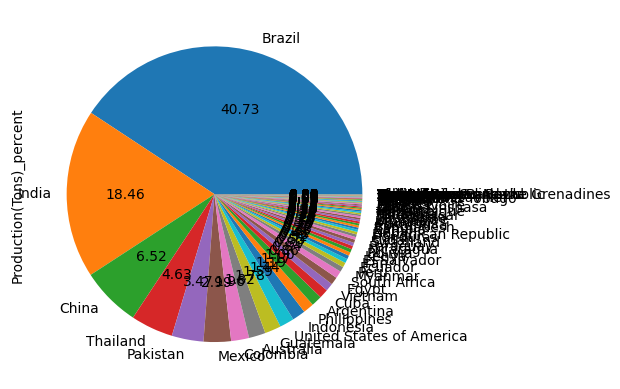

In [71]:
df_new["Production(Tons)_percent"].plot(kind="pie" , autopct = "%.2f" )

<Axes: xlabel='Country'>

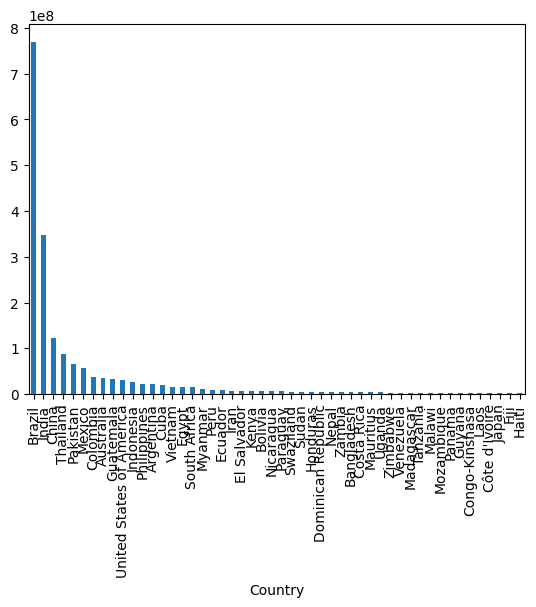

In [78]:
df_new["Production(Tons)"].head(50).plot(kind = "bar")

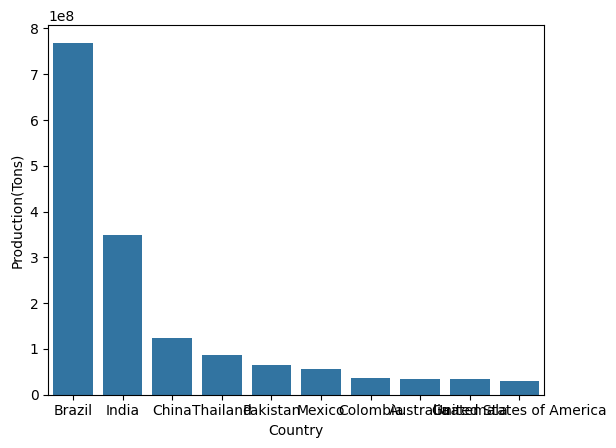

In [83]:
ax = sns.barplot(data = df.head(10),x = "Country" , y = "Production(Tons)")

C:\Users\Dell\AppData\Local\Temp\ipykernel_2080\1197817770.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() , rotation = 90)


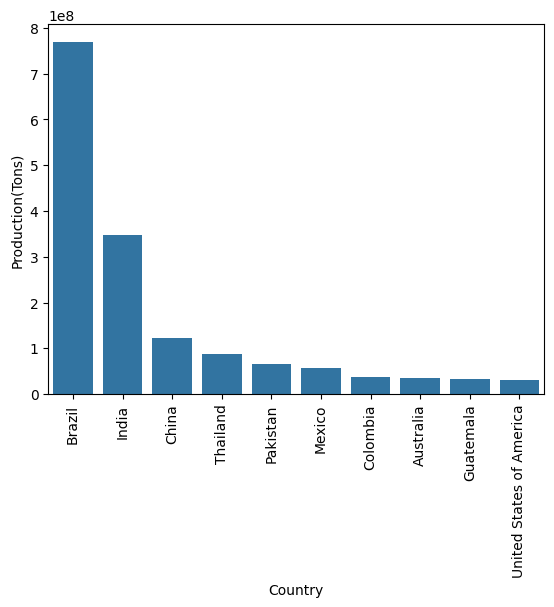

In [84]:
ax = sns.barplot(
    data=df.head(10),
    x="Country",
    y="Production(Tons)",
)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 90)
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_2080\2710451295.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


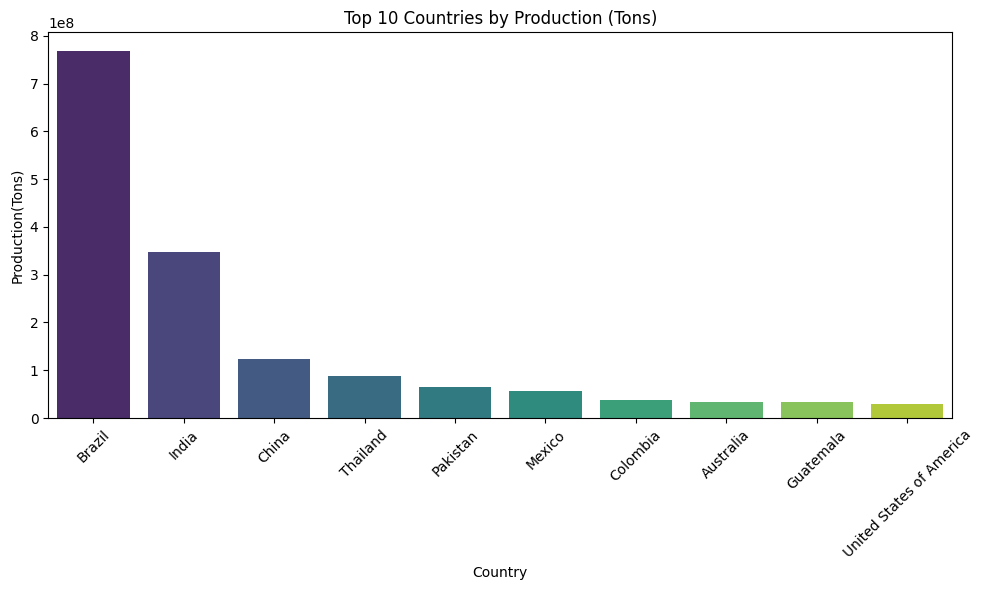

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=df.head(10),
    x="Country",
    y="Production(Tons)",
    palette="viridis"  # 🔥 Try others like 'pastel', 'Set2', 'coolwarm', etc.
)
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Production (Tons)")
plt.tight_layout()
plt.show()


## Which country has highest land?

C:\Users\Dell\AppData\Local\Temp\ipykernel_2080\3480358426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_2080\3480358426.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() , rotation = 90)


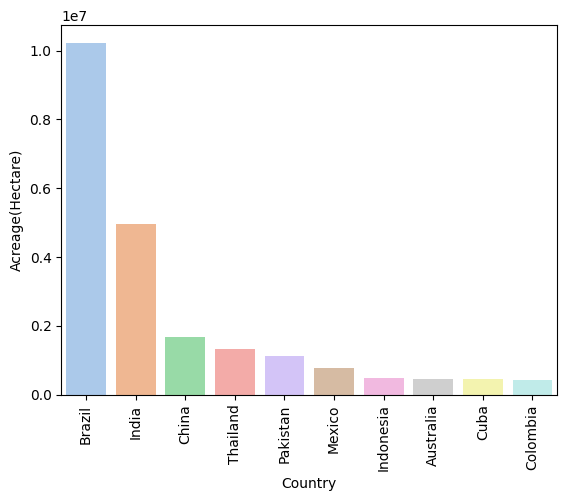

In [90]:
df_Acr = df.sort_values("Acreage(Hectare)" , ascending = False)
ax = sns.barplot(
    data=df_Acr.head(10),
    x="Country",
    y="Acreage(Hectare)",
    palette="pastel"  # 🔥 Try others like 'pastel', 'Set2', 'coolwarm', etc.
)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 90)
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_2080\3969314163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_2080\3969314163.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() , rotation = 90)


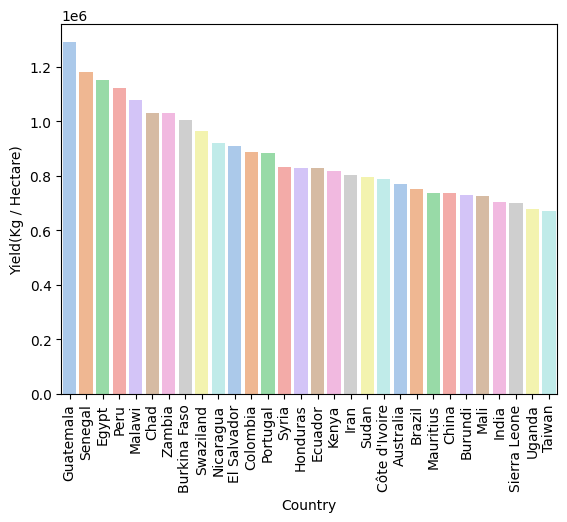

In [95]:
df_Yield = df.sort_values("Yield(Kg / Hectare)" , ascending = False)
ax = sns.barplot(
    data=df_Yield.head(30),
    x="Country",
    y="Yield(Kg / Hectare)",
    palette="pastel" 
)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 90)
plt.show()


## Which Country has highest Production?

In [107]:
#done this question answer is brazil 
df[["Country", "Production(Tons)"]].sort_values(by="Production(Tons)", ascending=False)


,Country,Production(Tons)
0,Brazil,768678382.0
1,India,348448000.0
2,China,123059739.0
3,Thailand,87468496.0
4,Pakistan,65450704.0
...,...,...
98,Lebanon,97.0
99,Singapore,50.0
100,Samoa,12.0
88,Saint Lucia,10.0


## Correlation

In [128]:
df.corr(numeric_only=True)


,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Production(Tons),1.000000,0.352369,0.997550,0.121125
Production per Person(Kg),0.352369,1.000000,0.341974,0.226719
Acreage(Hectare),0.997550,0.341974,1.000000,0.107826
Yield(Kg / Hectare),0.121125,0.226719,0.107826,1.000000


In [126]:
print(df.columns)


Index(['index', 'Country', 'Continent', 'Production(Tons)',
       'Production per Person(Kg)', 'Acreage(Hectare)', 'Yield(Kg / Hectare)'],
      dtype='object')


<Axes: >

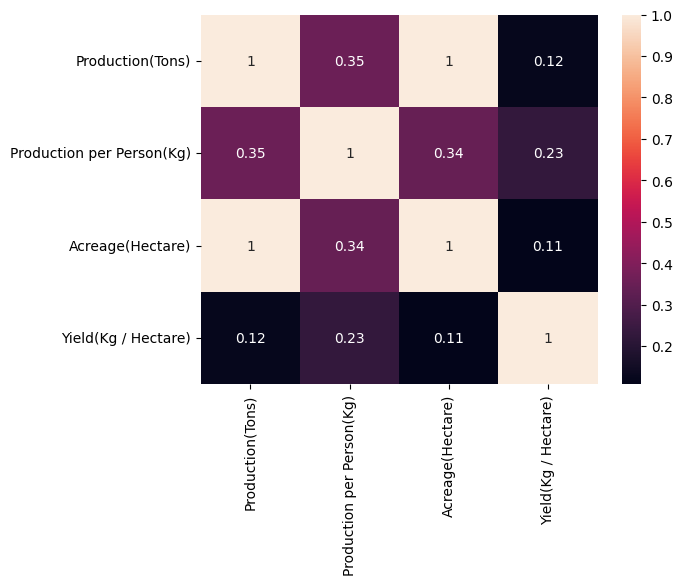

In [130]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

## Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

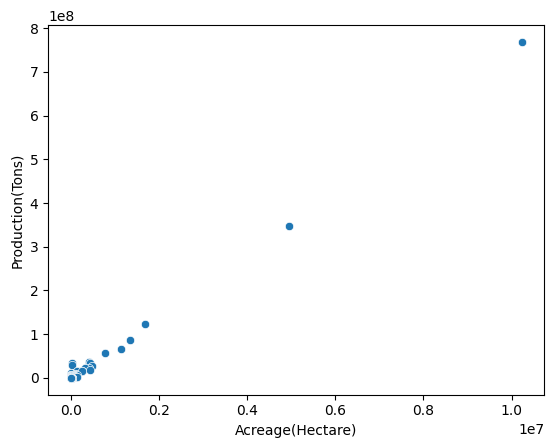

In [133]:
sns.scatterplot(data = df , x = "Acreage(Hectare)" , y = "Production(Tons)")

## Do countries which yield more sugarcae per hectare produces more sugarcane in total

<Axes: xlabel='Acreage(Hectare)', ylabel='Yield(Kg / Hectare)'>

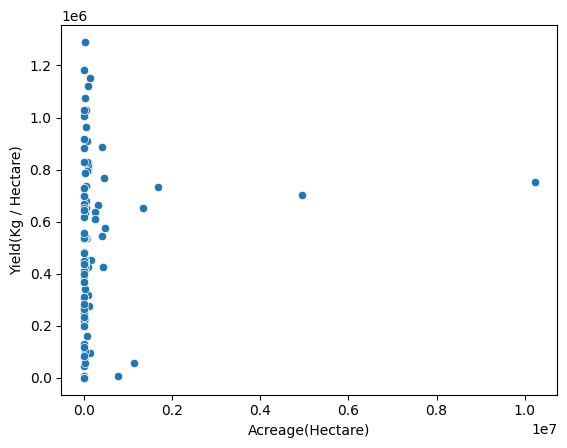

In [135]:
sns.scatterplot(data = df , x = "Acreage(Hectare)" , y = "Yield(Kg / Hectare)")

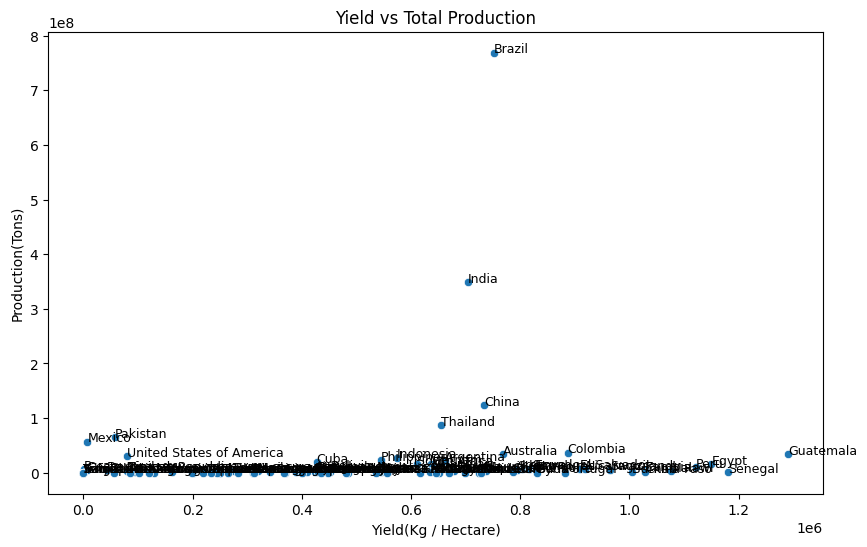

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Yield(Kg / Hectare)", y="Production(Tons)")

# Annotate points
for i in range(df.shape[0]):
    plt.text(df["Yield(Kg / Hectare)"][i], df["Production(Tons)"][i], df["Country"][i], fontsize=9)

plt.title("Yield vs Total Production")
plt.show()


# Analysis for continent

In [138]:
df_continent = df.groupby("Continent").sum()
df_continent

,Country,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,10144110.0,1439089.0,20700454.0
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,11197308.0
Europe,PortugalSpain,5823.0,536.0,71.0,1318709.0
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,9581162.0
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,1624191.0
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,6766896.0


## Which Continent produces the maximum sugarcane?

<Axes: xlabel='Continent'>

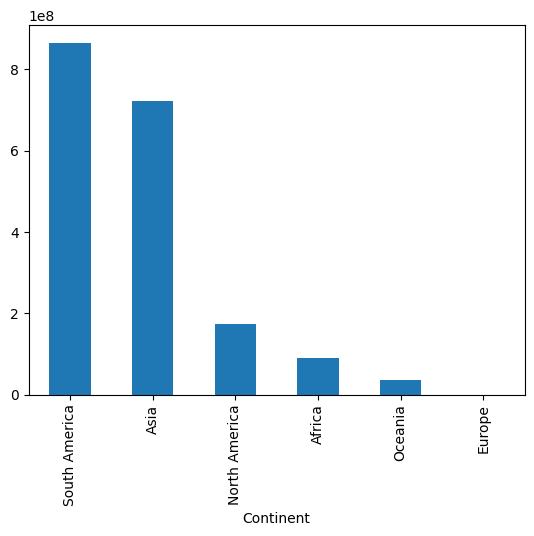

In [142]:
df_continent["Production(Tons)"].sort_values(ascending = False).plot(kind = "bar")

In [158]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [145]:
df["Continent"].value_counts(ascending = False)

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

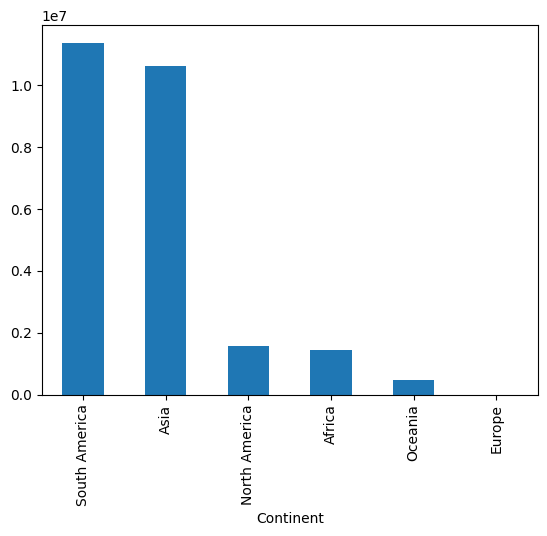

In [146]:
df_continent["Acreage(Hectare)"].sort_values(ascending = False).plot(kind = "bar")

## Do number of countries in a continent effects production of sugarcane?

Answer is no because just we have seen above number of highest countries 
in continent is in africa but south america has p\highest production(Tons)

In [161]:
df_continent.columns

Index(['Country', 'Production(Tons)', 'Production per Person(Kg)',
       'Acreage(Hectare)', 'Yield(Kg / Hectare)', 'number_of_countries'],
      dtype='object')

AttributeError: Text.set() got an unexpected keyword argument 'rotaion'

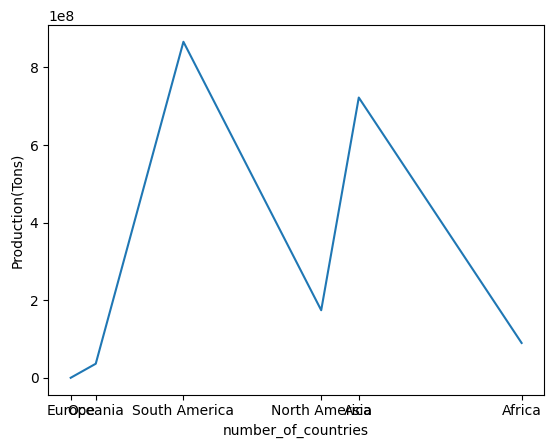

In [160]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent , x = "number_of_countries"  , y = "Production(Tons)")
plt.xticks(df_continent["number_of_countries"] , continent_names , rotaion = 90)
plt.show()

In [148]:
continent_names

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

## Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

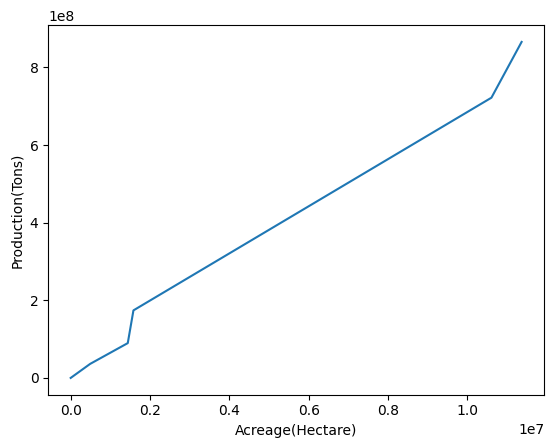

In [162]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

## Production distribution by continent

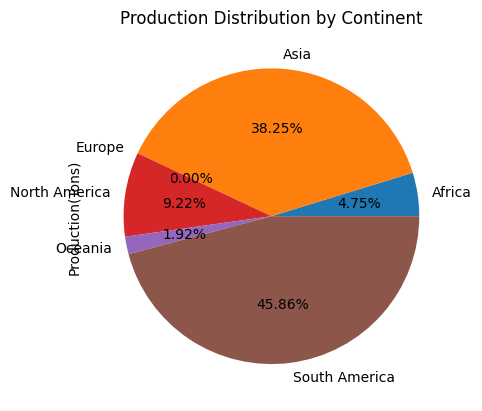

In [163]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

## Correlation for continent

In [166]:
df_continent.corr(numeric_only=True)

,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare),number_of_countries
Production(Tons),1.000000,0.143100,0.994897,0.104312,0.109244
Production per Person(Kg),0.143100,1.000000,0.073059,0.514924,0.526387
Acreage(Hectare),0.994897,0.073059,1.000000,0.126764,0.132817
Yield(Kg / Hectare),0.104312,0.514924,0.126764,1.000000,0.983807
number_of_countries,0.109244,0.526387,0.132817,0.983807,1.000000
